# Import

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

# Load Data

In [44]:
# Dossier des fichiers traités
DATA_DIR = "../../Data/processed"

# Lecture des CSV traités
train_df = pd.read_csv(os.path.join(DATA_DIR, "train_data.csv"))
test_df = pd.read_csv(os.path.join(DATA_DIR, "test_data.csv"))

print("Train dataset :", train_df.shape)
print("Test dataset :", test_df.shape)

Train dataset : (37300, 12)
Test dataset : (9325, 12)


# Genres analysis

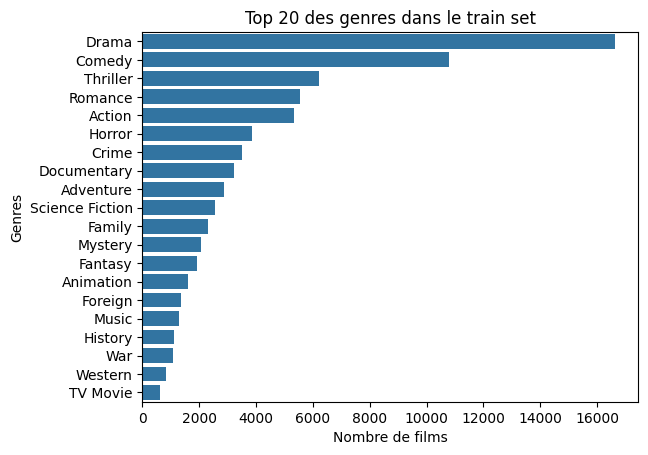

In [45]:
# Fonction pour compter les genres

all_genres = Counter([genre for sublist in train_df["genres"].dropna() for genre in eval(sublist)])
top_genres = all_genres.most_common(20)

# Histogramme des 20 genres les plus fréquents
genres, counts = zip(*top_genres)
sns.barplot(x=list(counts), y=list(genres))
plt.title("Top 20 des genres dans le train set")
plt.xlabel("Nombre de films")
plt.ylabel("Genres")
plt.show()


 # Votes and weighted rating analyses

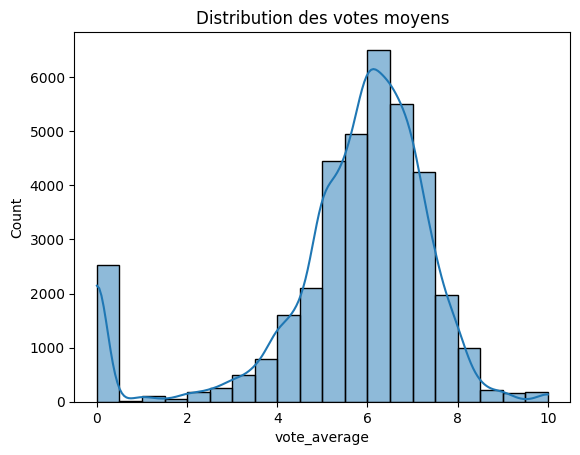

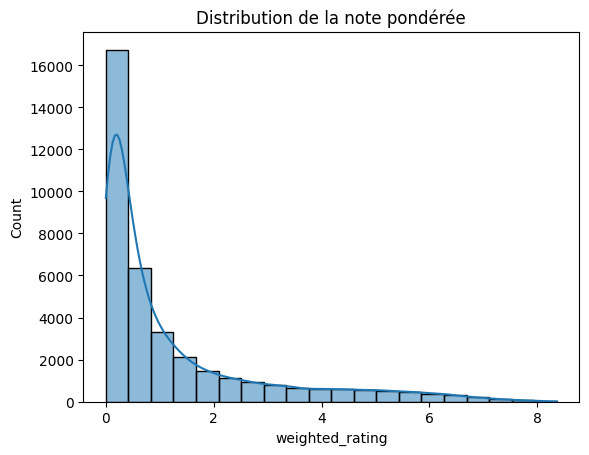

In [46]:
# Distribution de vote_average
sns.histplot(train_df["vote_average"], bins=20, kde=True)
plt.title("Distribution des votes moyens")
plt.show()

# Distribution de weighted_rating
sns.histplot(train_df["weighted_rating"], bins=20, kde=True)
plt.title("Distribution de la note pondérée")
plt.show()


# Budget and runtime analysis

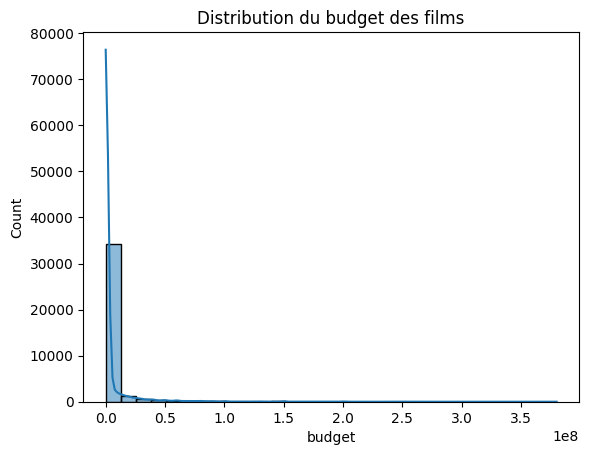

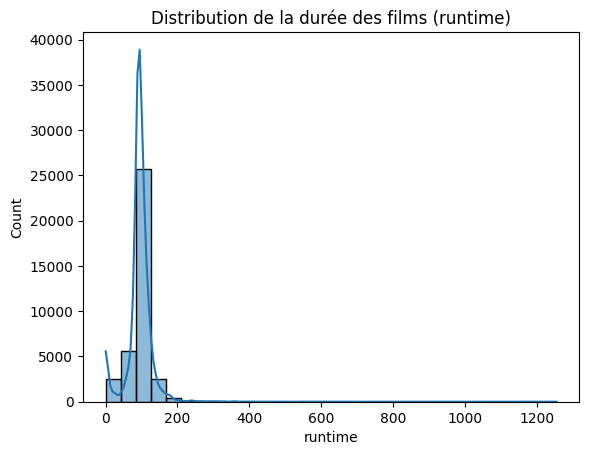

In [47]:
# Budget
sns.histplot(train_df["budget"], bins=30, kde=True)
plt.title("Distribution du budget des films")
plt.show()

# Runtime
sns.histplot(train_df["runtime"], bins=30, kde=True)
plt.title("Distribution de la durée des films (runtime)")
plt.show()


# Popularity analysis

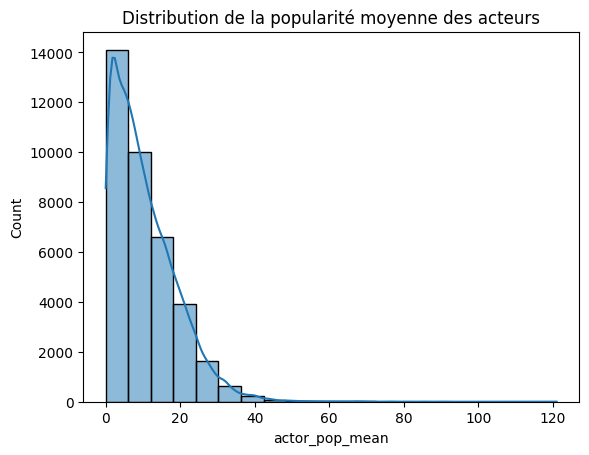

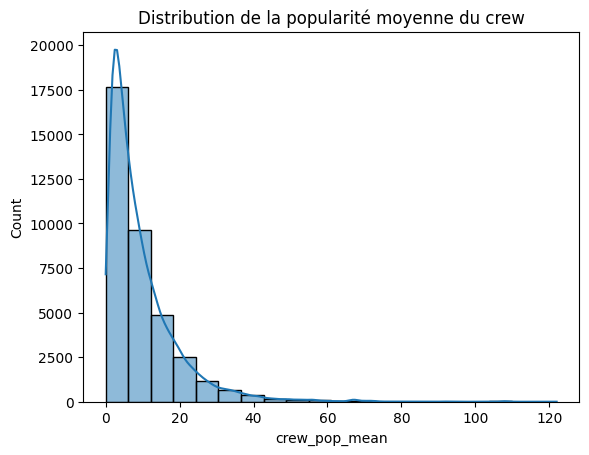

In [48]:
# Recréation des compteurs de popularité à partir du train set
actor_popularity = Counter()
for actors in train_df["actors"].dropna():
    actor_popularity.update(eval(actors))

crew_popularity = Counter()
for crew in train_df["crew"].dropna():
    crew_popularity.update(eval(crew))

# Fonction pour calculer la popularité
def popularity_features(names, popularity_dict):
    if not isinstance(names, list) or len(names) == 0:
        return 0.0, 0.0, 0
    pops = [popularity_dict.get(name, 0) for name in names]
    return sum(pops)/len(pops), max(pops), sum(p>5 for p in pops)

# Calcul pour acteurs
train_df[["actor_pop_mean", "actor_pop_max", "actor_pop_known"]] = train_df["actors"].apply(
    lambda x: pd.Series(popularity_features(eval(x), actor_popularity))
)

# Calcul pour crew
train_df[["crew_pop_mean", "crew_pop_max", "crew_pop_known"]] = train_df["crew"].apply(
    lambda x: pd.Series(popularity_features(eval(x), crew_popularity))
)

# Acteurs
sns.histplot(train_df["actor_pop_mean"], bins=20, kde=True)
plt.title("Distribution de la popularité moyenne des acteurs")
plt.show()

# Crew
sns.histplot(train_df["crew_pop_mean"], bins=20, kde=True)
plt.title("Distribution de la popularité moyenne du crew")
plt.show()


# Link between variables

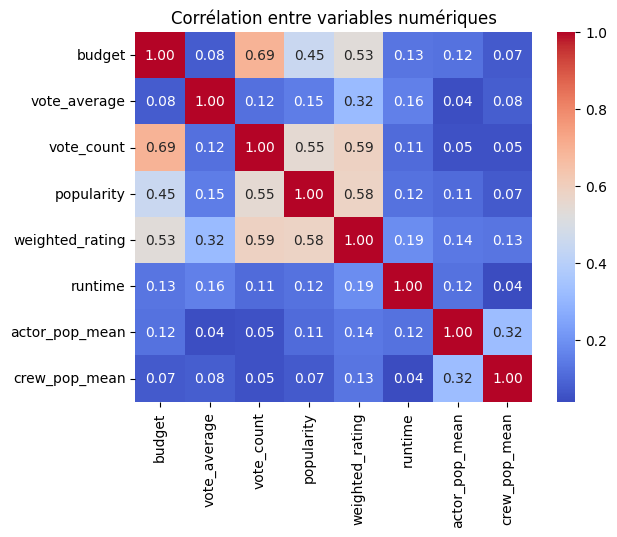

In [49]:
# Corrélation entre budget, vote, runtime et popularité
numeric_cols = ["budget", "vote_average", "vote_count", "popularity", 
                "weighted_rating", "runtime", "actor_pop_mean", "crew_pop_mean"]

corr = train_df[numeric_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélation entre variables numériques")
plt.show()


# Most popular films

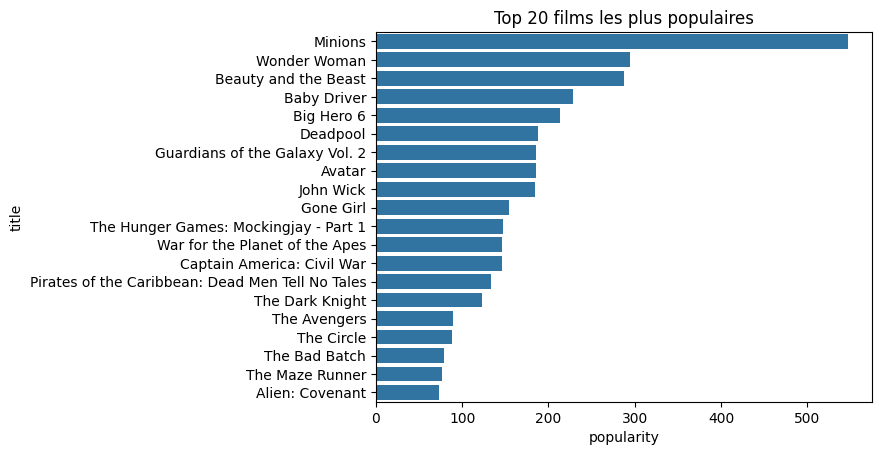

In [50]:
# Top 20 films les plus populaires
top_pop = train_df.sort_values("popularity", ascending=False).head(20)
sns.barplot(x="popularity", y="title", data=top_pop)
plt.title("Top 20 films les plus populaires")
plt.show()

# Most popular actors and crews

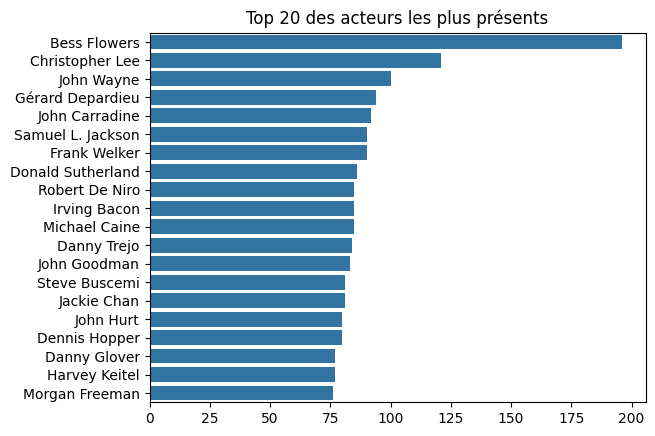

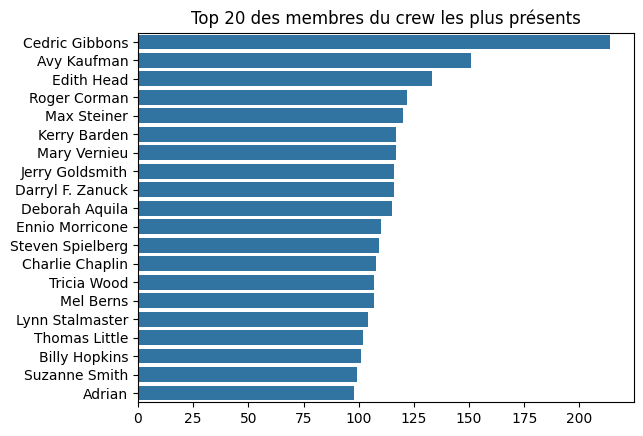

In [51]:
# Acteurs les plus fréquents
all_actors = Counter([actor for sublist in train_df["actors"].dropna() for actor in eval(sublist)])
top_actors = all_actors.most_common(20)
actors, counts = zip(*top_actors)
sns.barplot(x=list(counts), y=list(actors))
plt.title("Top 20 des acteurs les plus présents")
plt.show()

# Crew les plus fréquents
all_crew = Counter([c for sublist in train_df["crew"].dropna() for c in eval(sublist)])
top_crew = all_crew.most_common(20)
crew, counts = zip(*top_crew)
sns.barplot(x=list(counts), y=list(crew))
plt.title("Top 20 des membres du crew les plus présents")
plt.show()
